<a href="https://colab.research.google.com/github/leonard-sanya/mini_project/blob/main/notebooks/MLFC_Miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***ACCESS MODULES***

### 1.0 Install and Import Libraries & Legal Copyright

In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%%capture
%pip uninstall --yes fynesse
%pip install git+https://github.com/leonard-sanya/mini_project.git
%pip install osmnx
%%pip install contextily

In [3]:
import os, subprocess, importlib, sys

def load_repo(repo):
    local = repo.split("/")[-1]
    if not os.path.exists(local):
        subprocess.run(["git", "clone", f"https://github.com/{repo}.git"], check=True)
    else:
        subprocess.run(["git", "-C", local, "pull"], check=True)
    if local not in sys.path:
        sys.path.insert(0, local)
    mod = importlib.import_module(local)
    importlib.reload(mod)
    return mod
fynesse = load_repo("leonard-sanya/mini_project")

In [4]:
import os
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

# import pandas as pd
# import osmnx as ox
# import requests
# import geopandas as gpd
# import sys

import geopandas as gpd
from google.colab import files
import fynesse

In [5]:
fynesse.access.show_copyright_info()


                       MIT License
    Copyright (c) 2025 Leonard Sanya

    Permission is hereby granted, free of charge, to any person obtaining a copy
    of this software and associated documentation files (the "Software"), to deal
    in the Software without restriction, including without limitation the rights
    to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
    copies of the Software, and to permit persons to whom the Software is
    furnished to do so, subject to the following conditions:

    The above copyright notice and this permission notice shall be included in all
    copies or substantial portions of the Software.

    THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
    IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
    FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
    AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
    LIABILITY, WHETHE

### 1.1 Downloading Data

In this project, we will be working with three main datasets that form the foundation of our analysis:

### 1.

### 2. Population Dataset (2019 Kenya Census)

* **Source**: Kenya National Bureau of Statistics (via HDX or uploaded CSV).
* **Description**: Population by county from the 2019 census.
* **Access Method**: Manual CSV upload to Google Colab (since direct link can be unstable).


### 3. Kenya County Boundaries (GeoJSON)

* **Source**: [Humanitarian Data Exchange (HDX)](https://data.humdata.org/)
* **Description**: GeoJSON shapefile with county boundaries in Kenya.
* **Access Method**: Direct download via URL.


In [6]:
df_health_facilities = fynesse.access.load_datasets("https://raw.githubusercontent.com/leonard-sanya/mini_project/main/data/healthcare_facilities.csv")
df_population = fynesse.access.load_datasets("https://raw.githubusercontent.com/leonard-sanya/mini_project/main/data/2019-population_census-report-per-county.csv")
gdf_counties = gpd.read_file("https://raw.githubusercontent.com/leonard-sanya/mini_project/main/data/kenya.geojson")


Loading dataset from https://raw.githubusercontent.com/leonard-sanya/mini_project/main/data/healthcare_facilities.csv ...
Dataset loaded: (10013, 13)
Loading dataset from https://raw.githubusercontent.com/leonard-sanya/mini_project/main/data/2019-population_census-report-per-county.csv ...
Dataset loaded: (47, 11)


In [7]:
# csv_path = "/content/drive/MyDrive/saved_data/geo_features_county_1km.csv"  # adjust path if needed
# df_geo_features = pd.read_csv(csv_path)

# # Step 4: Check the first few rows

# print(df_geo_features.shape)
# df_geo_features.head()

In [8]:
# # Drop columns where all entries are NaN
# df_geo_features_clean = df_geo_features.dropna(axis=1, how='all')

# # Verify
# print("Shape after dropping columns with all NaN values:", df_geo_features_clean.shape)
# df_geo_features_clean.isna().sum()


#***ASSESS MODULE***


# Step 2: Data Exploration Helper Functions

To streamline our exploratory data analysis (EDA), we define a set of **helper functions** that summarize, visualize, and validate the datasets. Below is a detailed explanation of each function and its role:

## 1. overview(df)

- **Purpose**: Provides a quick snapshot of the dataset.  
- **Outputs**:
  - Shape of the dataset (rows × columns).  
  - Data types of each column.  
  - Missing values count.  
  - Number of unique values per column.  
- **Use Case**: First look at a dataset after loading it, to understand its structure and potential issues.


## 2. check_duplicates(df)

- **Purpose**: Identifies duplicate rows in the dataset.  
- **Outputs**: Total number of duplicate records.  
- **Use Case**: Ensures data quality by detecting redundancy, which can bias analysis and models.



## 3. categorical_summary(df, col)

- **Purpose**: Summarizes and visualizes categorical variables.  
- **Outputs**:
  - Frequency distribution (percentages).  
  - Bar chart of category counts.  
- **Use Case**: Understanding class balance, e.g., insurance policy types, vehicle categories.


## 4. numerical_summary(df, col)

- **Purpose**: Summarizes and visualizes numerical variables.  
- **Outputs**:
  - Descriptive statistics (mean, std, min, max, quartiles).  
  - Histogram with KDE (Kernel Density Estimate) curve.  
- **Use Case**: Spotting skewed distributions, outliers, and ranges in features like premium amounts or ages.



## 5. correlation_heatmap(df)

- **Purpose**: Examines correlations among numerical features.  
- **Outputs**:
  - Heatmap of correlation coefficients.  
- **Use Case**: Identifies multicollinearity (highly correlated features), which can affect model performance.


## 6. fraud_ratio(df, target_col="fraud_reported")

- **Purpose**: Analyzes class imbalance in the target variable (`fraud_reported`).  
- **Outputs**:
  - Percentage distribution of fraud vs non-fraud cases.  
  - Bar chart of class balance.  
- **Use Case**: Detects skewed target distributions, which is critical for fraud detection tasks since fraud cases are usually rare.


## Motivation

Together, these helper functions provide a **systematic EDA workflow**:
1. `overview()` → dataset structure & issues.  
2. `check_duplicates()` → data quality check.  
3. `categorical_summary()` & `numerical_summary()` → variable-level insights.  
4. `correlation_heatmap()` → relationships between numeric features.  
5. `fraud_ratio()` → balance in the prediction target.  

This structured approach ensures **clean, well-understood data** before moving into deeper analysis or modeling.

In [9]:
possible_names = ["County", "COUNTY_NAM",'county_']

df_population =  fynesse.assess.standardize_county_column(df_population,possible_names )
df_health_facilities = fynesse.assess.standardize_county_column(df_health_facilities,possible_names )
gdf_counties = fynesse.assess.standardize_county_column(gdf_counties, possible_names)


In [10]:
county_name_mapping = {
    'Tharaka Nithi': 'Tharaka - Nithi',
    'Tharaka-Nithi': 'Tharaka - Nithi',
    'Elgeyo Marakwet':'Elegeyo-Marakwet',
    'Elgeyo-Marakwet':'Elegeyo-Marakwet',
    'Murang\'a':'Murang\'A'
}

df_population, df_health_facilities = fynesse.assess.harmonize_county_names(
    df_population,
    df_health_facilities,
    gdf_counties,
    county_name_mapping
)



Harmonizing county names...
Counties in population but not in GeoJSON: {'Tharaka-Nithi', 'Elgeyo-Marakwet'} 

Counties in health_facilities but not in GeoJSON: {'Elgeyo Marakwet', 'Tharaka Nithi'} 

Harmonization complete.


In [11]:
df_health_facilities['Type'].unique()

array(['Dispensary', 'Medical Clinic', 'Nursing Home', 'Health Centre',
       'Sub-District Hospital', 'Dental Clinic', 'Maternity Home',
       'VCT Centre (Stand-Alone)',
       'Training Institution in Health (Stand-alone)',
       'Laboratory (Stand-alone)', 'Other Hospital', 'Medical Centre',
       'Not in List', 'Health Project', 'District Hospital', 'Eye Centre',
       'Provincial General Hospital', 'Health Programme',
       'District Health Office', 'Radiology Unit', 'Blood Bank',
       'Eye Clinic', 'National Referral Hospital',
       'Regional Blood Transfusion Centre', 'Funeral Home (Stand-alone)',
       'Rural Health Training Centre'], dtype=object)

In [12]:
high_demand_facilities = [
    "Dispensary",
    "Medical Clinic",
    "Health Centre",
    "District Hospital",
    "Sub-District Hospital",
    "Provincial General Hospital",
    "National Referral Hospital",
    "Maternity Home",
    "Laboratory (Stand-alone)",
    "Dental Clinic"
]


subset_health_facilities = df_health_facilities[
    df_health_facilities['Type'].isin(high_demand_facilities)
]
display(subset_health_facilities.head())


,OBJECTID,Facility_N,Type,Owner,county,Sub_County,Division,Location,Sub_Locati,Constituen,Nearest_To,Latitude,Longitude,County
0,1,CDF Kiriari Dispensary,Dispensary,Ministry of Health,Embu,Manyatta,Manyatta,Ruguru,Ruguru,MANYATTA,Kiriari -market,-0.39940,37.47605,Embu
1,2,St Jude's Huruma Community Health Services,Medical Clinic,Private Practice - Unspecified,Nairobi,Mathare,Huruma,Huruma,Huruma,MATHARE,Kariobangi Market,-1.26174,36.87765,Nairobi
2,3,12 Engineers,Dispensary,Ministry of Health,Kiambu,Thika West,,,,JUJA,,-1.07354,37.14413,Kiambu
4,5,8Th Street Clinic,Medical Clinic,Private Enterprise (Institution),Kajiado,Kajiado North,Isinya,Isinya,Isinya Township,KAJIADO NORTH,Isinya,-1.41187,36.50854,Kajiado
5,6,AAR Adams Health Centre,Medical Clinic,Private Practice - General Practitioner,Nairobi,Kibra,Woodly,Woodly,Woodly,KIBRA,Adams,-1.30047,36.73162,Nairobi


In [13]:
# facility count by Type
df_facility_type_counts = (
    subset_health_facilities.groupby('Type')
    .size()
    .reset_index(name='Count')
    .fillna(0)
    .reset_index()
)

display(df_facility_type_counts['Count'].sum())


np.int64(9295)

In [14]:
def data_preprocess(df_population, subset_health_facilities, hospital_threshold=None):
    preprocessed_data = df_population[['County', 'Total_Population19', 'Population Density']].copy()

    df_facility_count = (
        subset_health_facilities.groupby('County')
        .size()
        .reset_index(name='Facility Count')
    )
    preprocessed_data = pd.merge(
        preprocessed_data, df_facility_count, on='County', how='left'
    )

    numeric_cols = ['Total_Population19', 'Population Density', 'Facility Count']
    for col in numeric_cols:
        preprocessed_data[col] = (
            preprocessed_data[col].astype(str)           # convert to string
            .str.replace(',', '', regex=True)            # remove commas
            .str.strip()                                 # remove leading/trailing spaces
        )
        preprocessed_data[col] = pd.to_numeric(preprocessed_data[col], errors='coerce')

    # Calculate hospitals per 100k people
    preprocessed_data['Hospital_per_100k'] = (
        preprocessed_data['Facility Count'] * 100_000 / preprocessed_data['Total_Population19']
    )

    # Add underserved column (0 = Yes underserved, 1 = No)
    preprocessed_data['Underserved'] = (
        preprocessed_data['Hospital_per_100k'] >= hospital_threshold
    ).astype(int)

    preprocessed_data = preprocessed_data[
        ['County', 'Total_Population19', 'Population Density',
         'Facility Count', 'Hospital_per_100k', 'Underserved']
    ]

    return preprocessed_data


In [15]:
preprocessed_data = data_preprocess(df_population, subset_health_facilities, hospital_threshold=20)
display(preprocessed_data)

,County,Total_Population19,Population Density,Facility Count,Hospital_per_100k,Underserved
0,Baringo,666763,61,216,32.395319,1
1,Bomet,875689,346,130,14.845453,0
2,Bungoma,1670570,552,166,9.936728,0
3,Busia,893681,527,109,12.196746,0
4,Elegeyo-Marakwet,454480,150,127,27.944024,1
5,Embu,608599,216,163,26.782824,1
6,Garissa,841353,19,143,16.996433,0
7,Homa Bay,1131950,359,206,18.198684,0
8,Isiolo,268002,11,50,18.656577,0
9,Kajiado,1117840,51,268,23.974809,1


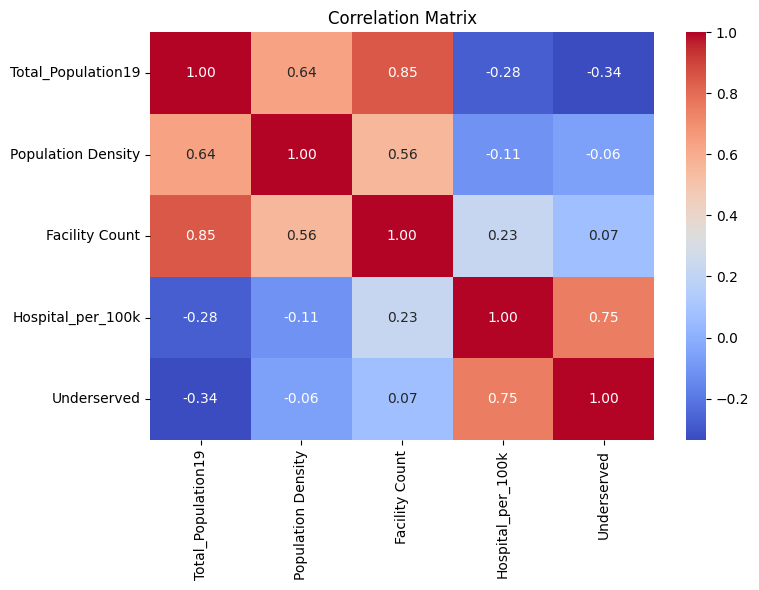

In [16]:
corr_matrix = fynesse.assess.analyse_correlation(preprocessed_data)


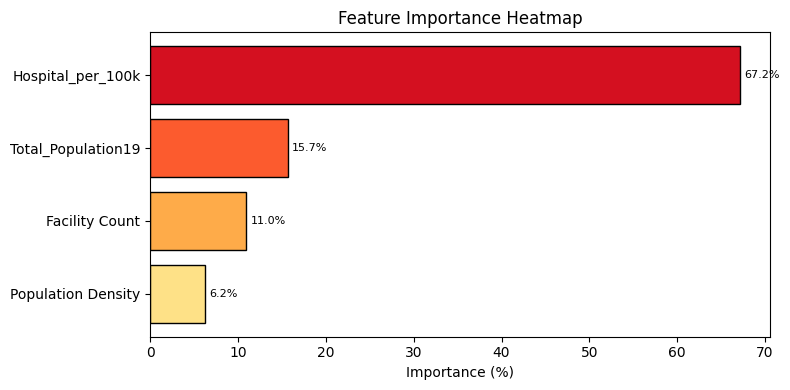

In [17]:
rf_model, importances_df = fynesse.assess.plot_feature_importance_rf(preprocessed_data, target_col="Underserved")


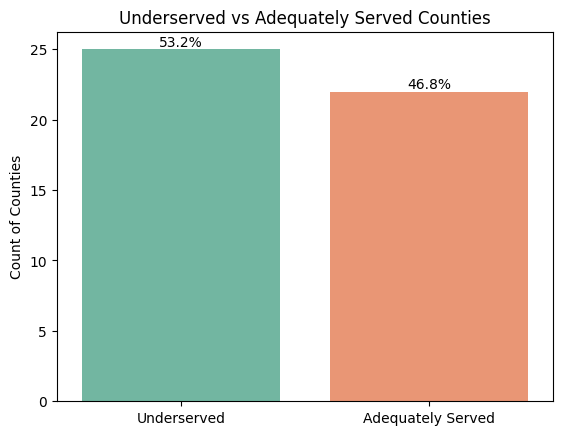

In [18]:
fynesse.assess.plot_underserved_distribution(preprocessed_data,target_col='Underserved')


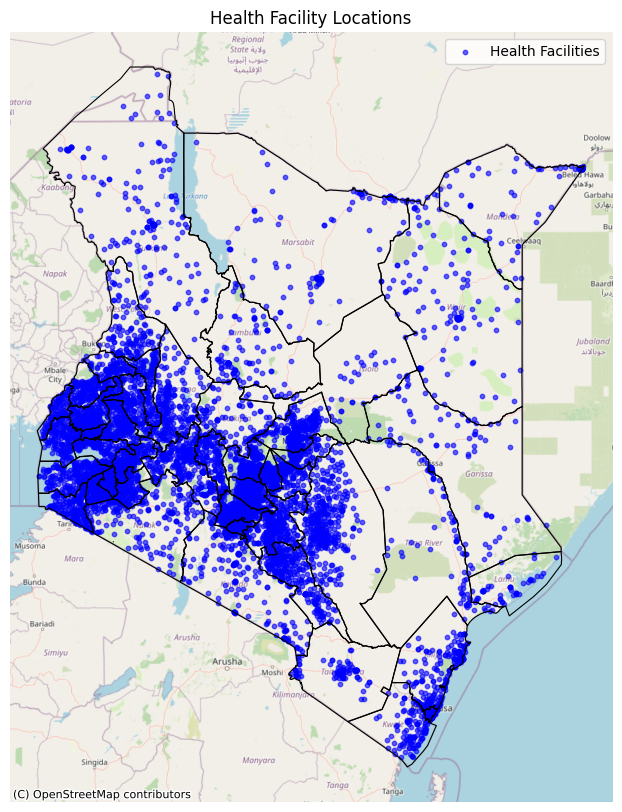

In [19]:
fynesse.assess.plot_health_facilities(
    df_facilities=df_health_facilities,
    gdf_counties=gdf_counties
)


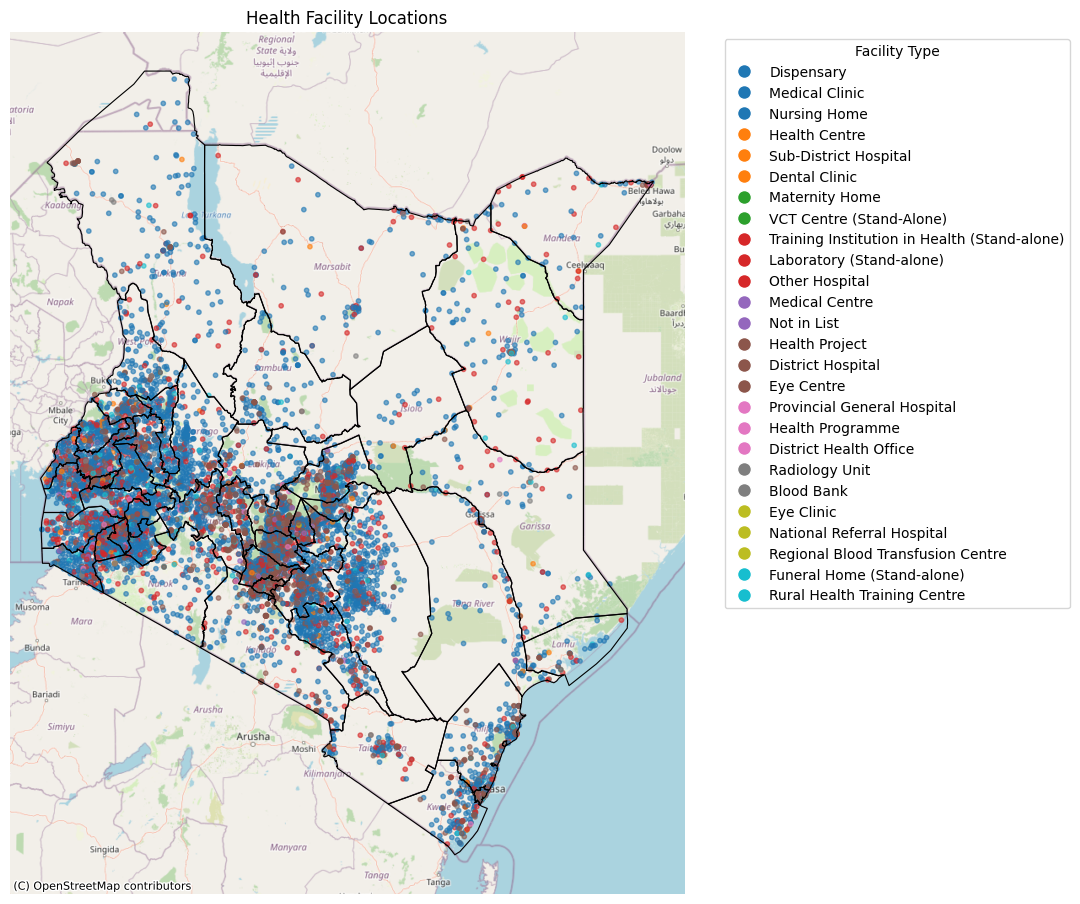

In [20]:
fynesse.assess.plot_health_facilities_byType(
    df_facilities=df_health_facilities,
    gdf_counties=gdf_counties
)

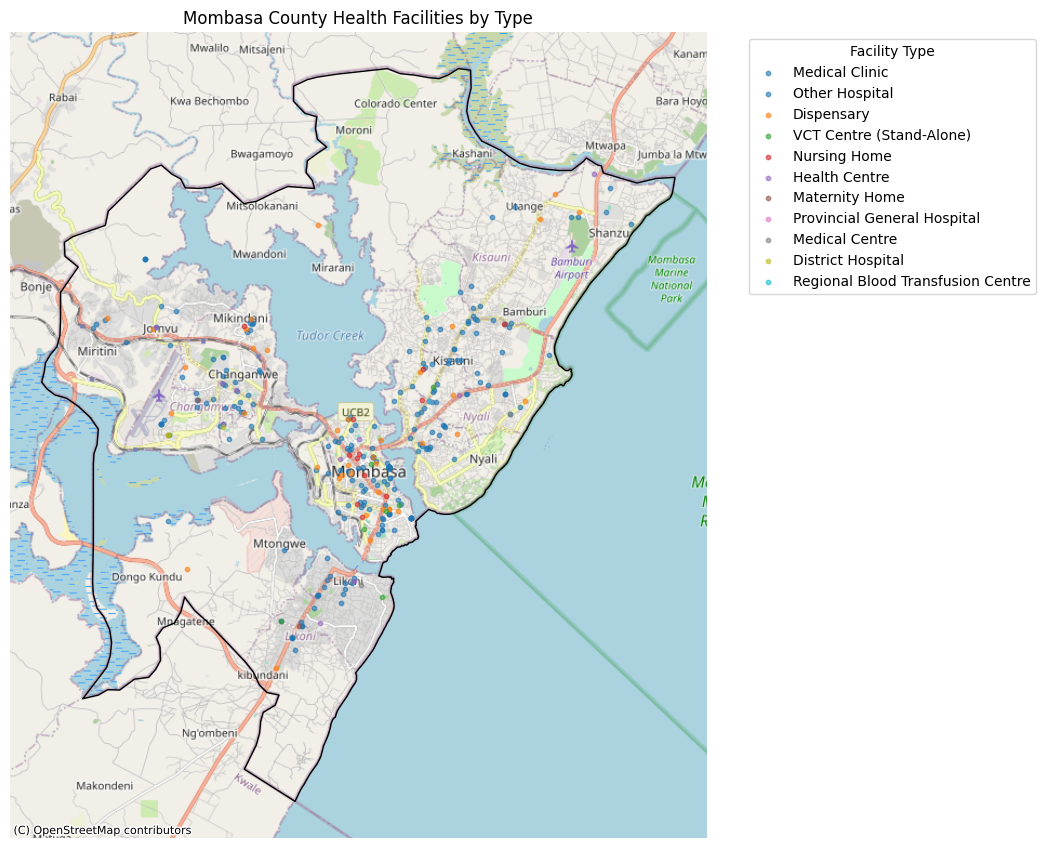

In [21]:
fynesse.assess.plot_county_facilities(
    county_name="Mombasa",
    df_facilities=df_health_facilities
)


#***ADDRESS MODULE***

## One-hot encoding on County

In [22]:
encoded_preprocessed_data = pd.get_dummies(preprocessed_data, columns=['County'])

X = encoded_preprocessed_data.drop(columns="Underserved").apply(pd.to_numeric, errors='coerce')
y = encoded_preprocessed_data["Underserved"].astype(int)

X = X.fillna(0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Logistic Regression

###Training

In [23]:
from fynesse import address
underserved_clf = address.train_underserved_classifier(X_train, y_train)

###Evaluation

In [24]:
y_pred = address.evaluate_underserved_classifier(underserved_clf, X_test, y_test)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.86      0.86      0.86         7

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15



###Confusion Matrix

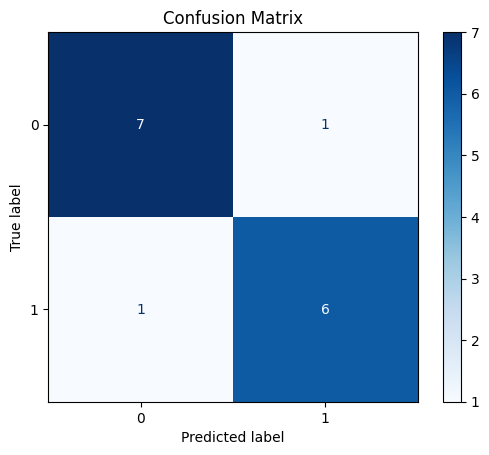

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fynesse.address.plot_underserved_confusion_matrix(y_test, y_pred, labels=underserved_clf.classes_)


## Naive Bayes

###Training the NB model

In [26]:
nb_model = fynesse.address.train_naive_bayes(X_train, y_train)

###Evaluation

In [30]:
fynesse.address.evaluate_naive_bayes(nb_model, X_test, y_test, 0)

'Probability of county being 0: 0.327 | Overall accuracy: 0.400'

###Plot ROC curve

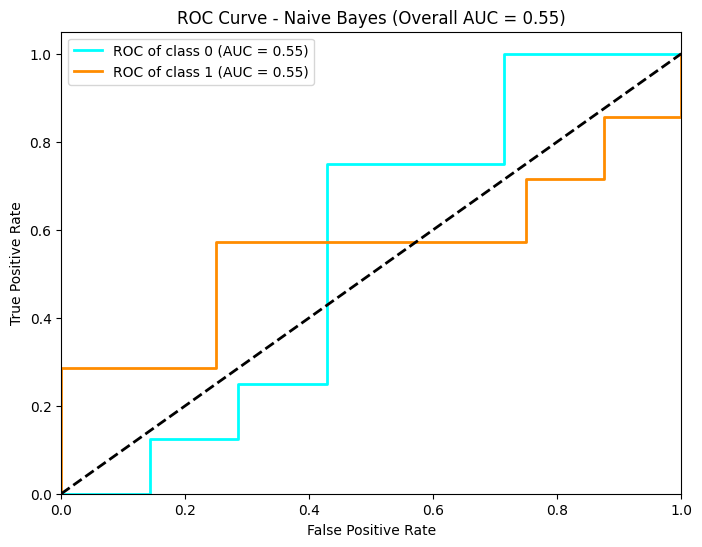

In [31]:
fynesse.address.plot_roc_curve(nb_model,X_test,y_test)